<a href="https://colab.research.google.com/github/Nastarii/AutoencodersNN/blob/main/Autoencoders_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision
!pip install torch

from torchvision import datasets
from torchvision import transforms

from tqdm.notebook import tqdm

import torch
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root = "./data",
      train = True,
      download = True,
      transform = tensor_transform)

loader = torch.utils.data.DataLoader(dataset = dataset,
         batch_size = 64,
         shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 84181296.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 98725096.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21602641.95it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2971074.36it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class AutoEncoder(torch.nn.Module):
 def __init__(self):
  super().__init__()
  
  self.encoder = torch.nn.Sequential(
   torch.nn.Linear(28 * 28, 128),
   torch.nn.ReLU(),
   torch.nn.Linear(128, 64),
   torch.nn.ReLU(),
   torch.nn.Linear(64, 36),
   torch.nn.ReLU(),
   torch.nn.Linear(36, 18),
   torch.nn.ReLU(),
   torch.nn.Linear(18, 9)
  )
  
  self.decoder = torch.nn.Sequential(
   torch.nn.Linear(9, 18),
   torch.nn.ReLU(),
   torch.nn.Linear(18, 36),
   torch.nn.ReLU(),
   torch.nn.Linear(36, 64),
   torch.nn.ReLU(),
   torch.nn.Linear(64, 128),
   torch.nn.ReLU(),
   torch.nn.Linear(128, 28 * 28),
   torch.nn.Sigmoid()
  )

 def forward(self, x):
  encoded = self.encoder(x)
  decoded = self.decoder(encoded)
  return decoded

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoEncoder().to(device)
loss_function = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),
       lr = 1e-1,
       weight_decay = 1e-6)

In [26]:
epochs = 25
losses = []

for epoch in tqdm(range(epochs)):
 for (image, _) in loader:
 
   image = image.reshape(-1, 28*28).to(device)
   reconstructed = model(image)
   
  
   loss = loss_function(reconstructed, image)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()
   
   losses.append(loss)

  0%|          | 0/25 [00:00<?, ?it/s]

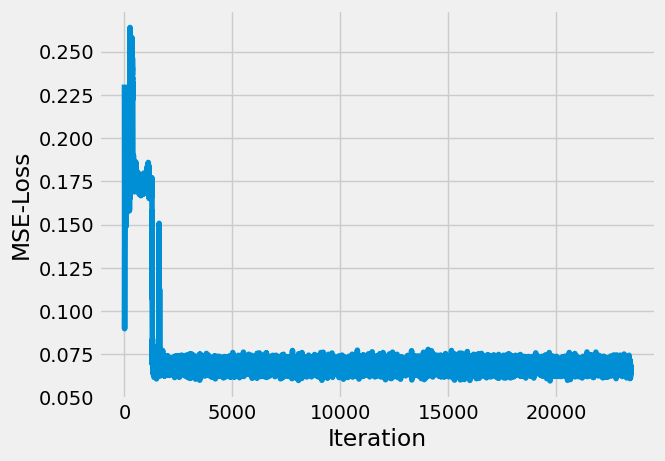

In [27]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iteration')
plt.ylabel('MSE-Loss')
plt.plot([loss.cpu().detach().numpy() for loss in losses])

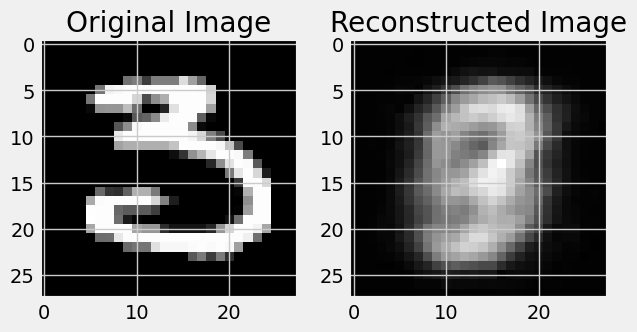

In [36]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

# Define the transform
tensor_transform = transforms.ToTensor()


# Select an image from the dataset to visualize
image_index = 670
image = dataset[image_index][0]

# Reshape and pass the image through the model for reconstruction
reconstructed_image = model(image.reshape(-1, 28 * 28).to(device)).cpu()
reconstructed_image = reconstructed_image.reshape(28, 28).detach().numpy()

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")

# Plot the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.squeeze(), cmap="gray")
plt.title("Reconstructed Image")

# Show the plot
plt.tight_layout()
plt.show()